## Dataset: ISOT Dataset

[Dataset Link](https://onlineacademiccommunity.uvic.ca/isot/2022/11/27/fake-news-detection-datasets/)

1. Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text 
classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, 
January/February 2018.
2. Ahmed H, Traore I, Saad S. (2017) "Detection of Online Fake News Using N-Gram
Analysis and Machine Learning Techniques." In: Traore I., Woungang I., Awad A. (eds)
Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. 
ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138)

## Data Pre Processing

### Load Dataset

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
!pip install gensim
import nltk
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import seaborn as sns 
import gensim
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

You should consider upgrading via the 'C:\Users\Gokul\Desktop\python-scraping\sem6\Scripts\python.exe -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
real_news = pd.read_csv("isot/True.csv")
fake_news = pd.read_csv("isot/Fake.csv")

In [3]:
# Combining both dataset into a single one
real_news['target']=1
fake_news['target']=0
df = pd.concat([real_news,fake_news]).reset_index(drop=True)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  target  \
0  December 31, 2017        1   
1  December 29, 2017        1   
2  December 31, 2017        1   
3  December 30, 2017        1   
4  December 29, 2017        1   

                                            original  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

In [ ]:
# Combine title and text into a single column
df['original'] = df['title'] + ' ' + df['text']
df.head()

### Explore data

In [4]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  target  \
0  December 31, 2017        1   
1  December 29, 2017        1   
2  December 31, 2017        1   
3  December 30, 2017        1   
4  December 29, 2017        1   

                                            original  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

In [5]:
df.tail()

title  \
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
44893  21st Century Wire says As 21WIRE reported earl...  Middle-east   
44894  21st Century Wire says It s a familiar theme. ...  Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
44896  21st Century Wire says Al Jazeera America will...  Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  target  \
44893  January 16, 2016       0   
44894  January 16, 2016       0   
44895  January 15, 2016       0   
44896  January 14, 2016       0   
44897  January 12, 2016       0   

                                                original  
44893  McPain: John McCain Furious That Iran Treated ...  
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  
44896  How to Blow $700 Million: Al Jazeera America F...  
44897  10 U.S. Navy Sailors Held by Iranian Military ...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   target    44898 non-null  int64 
 5   original  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


Now we need to set the datatypes correct for date column

Some rows were not having proper dates.We replace them with top dates

In [7]:
df['date'] = pd.to_datetime(df['date'],errors="coerce")
df["date"].fillna(df['date'].max(), inplace=True)

In [8]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews 2017-12-31   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews 2017-12-29   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews 2017-12-31   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews 2017-12-30   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews 2017-12-29   

   target                                           original  
0       1  As U.S. budget fight looms, Republicans flip t...  
1       1  U.S. military to accept transgender recruits o...  
2       1  Senior U.S. Republican senator: 'Let Mr. Muell...  
3       1  FBI Russia probe helped by Australian diplomat...  
4       1  Trump wants Postal Service to charge 'much mor...

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     44898 non-null  object        
 1   text      44898 non-null  object        
 2   subject   44898 non-null  object        
 3   date      44898 non-null  datetime64[ns]
 4   target    44898 non-null  int64         
 5   original  44898 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.1+ MB


Visualising at what rates fake news has been recorded

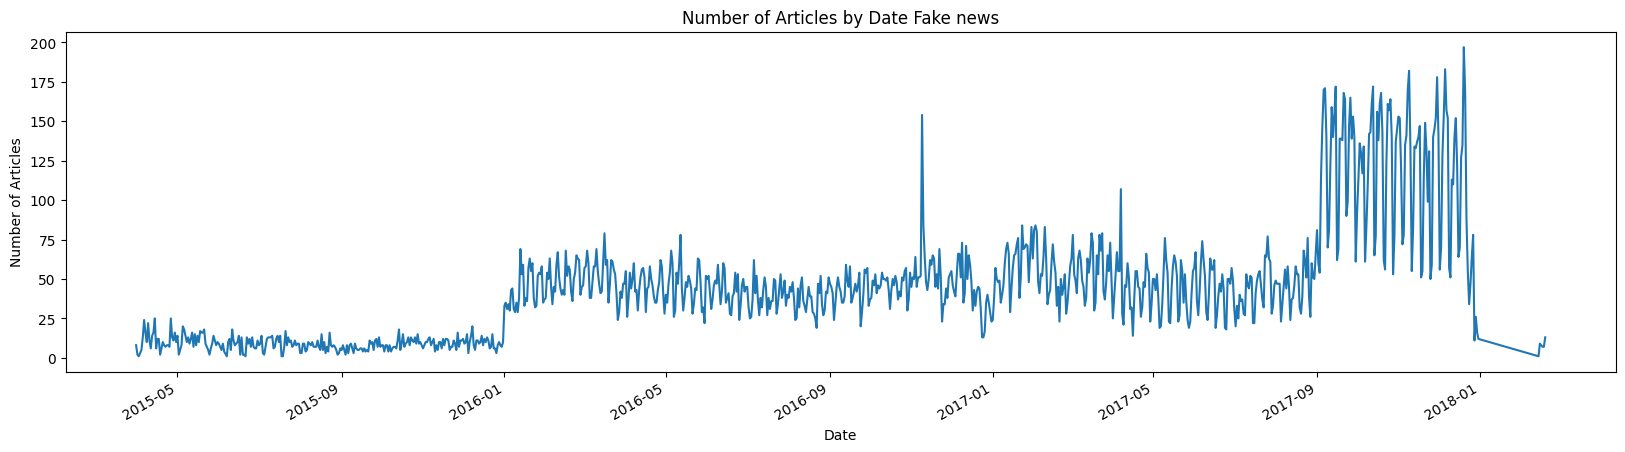

In [14]:
fig, ax = plt.subplots(figsize=(20, 5))
df['date'].value_counts().plot(kind='line',ax=ax)
plt.title('Number of Articles by Date Fake news')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [15]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
target      0
original    0
dtype: int64

No null values are observed. Dataset is pretty clean.
Some string entries were observed in date column in fake news dataset and were replaced with top date

Remove any unnecessary words (Stopwords) from the data provided

In [16]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return result

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Transforming the non-matching subjects to the same notation
df.subject=df.subject.replace({'politics':'PoliticsNews','politicsNews':'PoliticsNews'})

Distribution of Subjects between the True and Fake News

In [75]:
sub_tf_df=df.groupby('target').apply(lambda x:x['title'].count()).reset_index(name='Counts')
sub_tf_df.target.replace({0:'False',1:'True'},inplace=True)
fig = px.bar(sub_tf_df, x="target", y="Counts",
             color='Counts', barmode='group',
             height=400)
fig.show()

Dataset is balanced

Subjects that received the most news coverage

In [21]:
sub_check=df.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by Subject')
fig.show()

Using combination of title and content to make predictions

Applying stopword removal function here

In [40]:
df['clean_final'] = df['original'].apply(preprocess)
df['clean_joined_final']=df['clean_final'].apply(lambda x:" ".join(x))

Wordcloud for real news

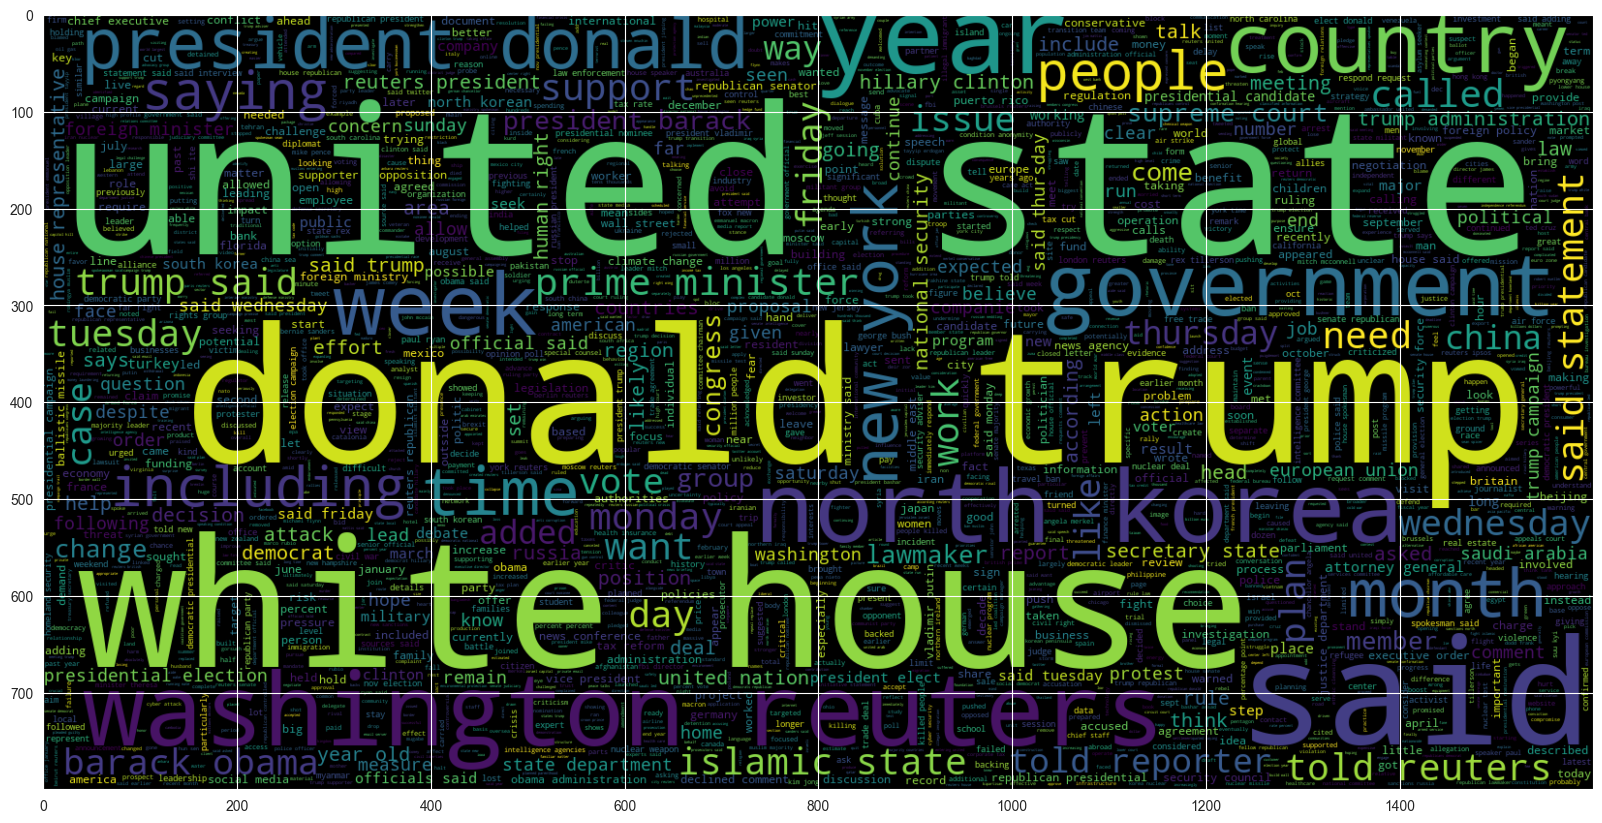

In [41]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == 1].clean_joined_final))
plt.imshow(wc, interpolation = 'bilinear')

Wordcloud for fake news

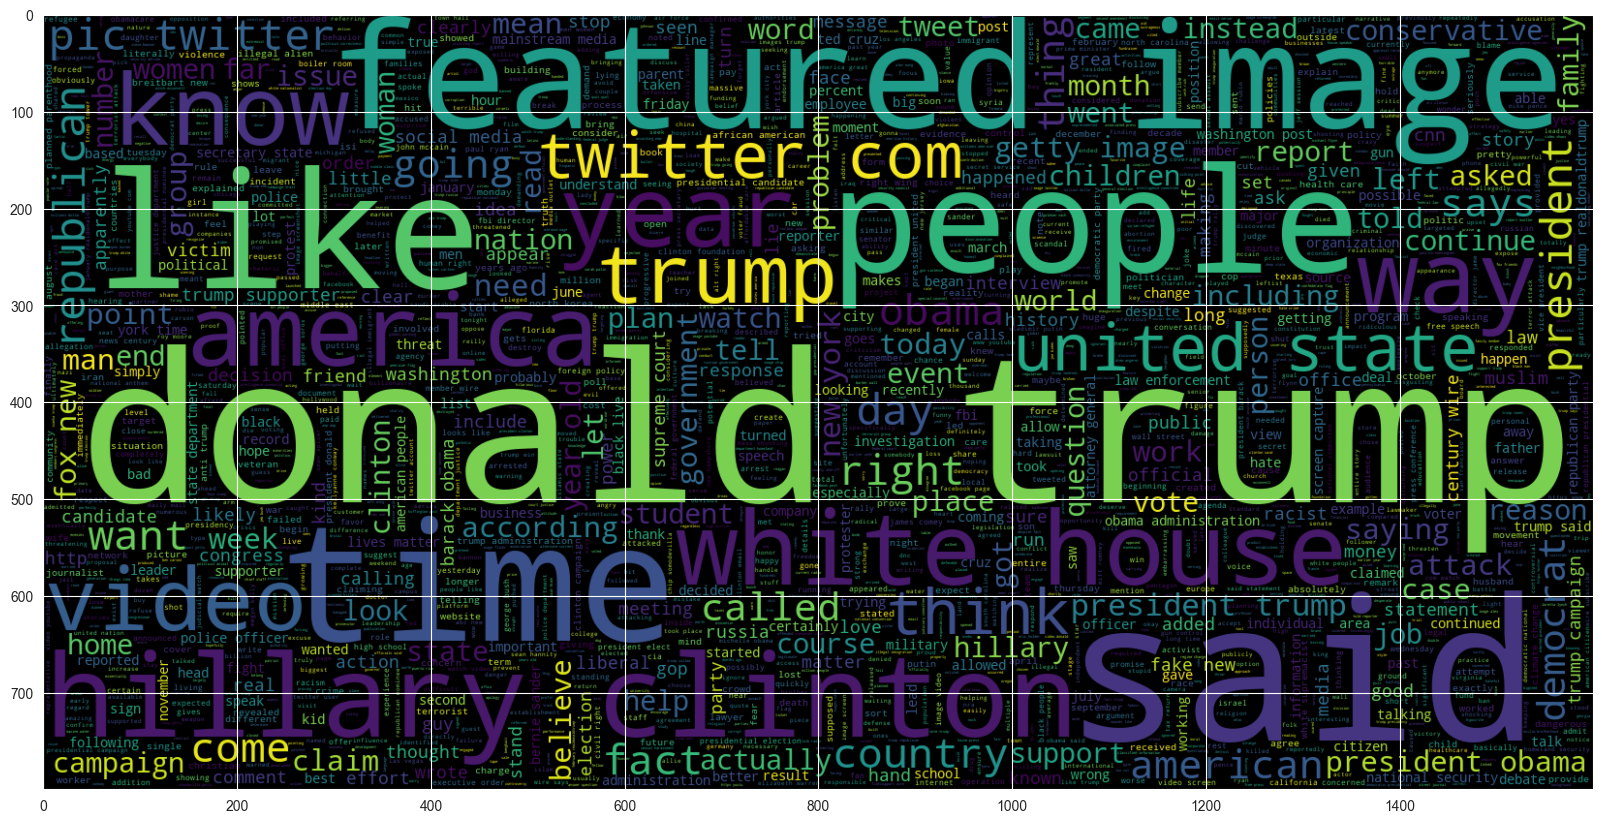

In [42]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == 0].clean_joined_final))
plt.imshow(wc, interpolation = 'bilinear')

Identifying no of words in news content

In [43]:
maxlen = -1
for doc in df.clean_joined_text:
    tokens = nltk.word_tokenize(doc)
    if maxlen<len(tokens):
        maxlen = len(tokens)
print("The maximum number of words in a News Content is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined_final], nbins = 50)
fig.show()

The maximum number of words in a News Content is = 4573


No of sentences in each content

In [45]:
df['len_sentence'] = df['clean_joined_final'].apply(len)
sns.boxplot(y='len_sentence', x='target', data=df, palette="Set3")
plt.title("Boxplot of Number of Sentences in Fake and Genuine Articles")
plt.show()

Length of sentences in fake news articles is high

Average No. of Words per Sentence Article


In [51]:
from nltk import sent_tokenize
df['sent_tokens'] = df['clean_joined_final'].apply(sent_tokenize)

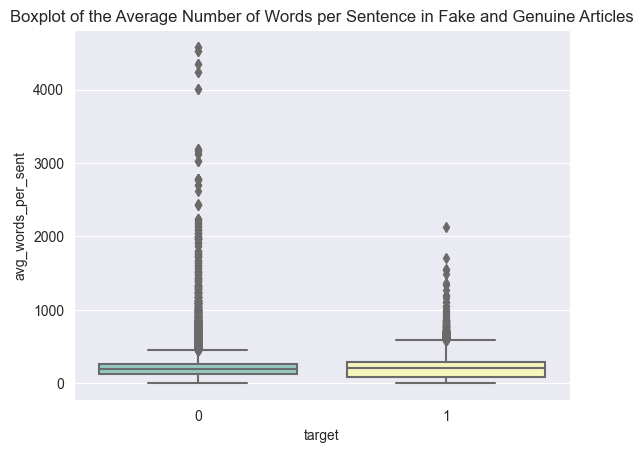

In [53]:
import string
df['sent_word_tokens'] = df['sent_tokens'].apply(lambda x: [nltk.word_tokenize(each_sentence) for each_sentence in x])
def get_seq_tokens_cleaned(seq_tokens):
  no_punc_seq = [each_seq.translate(str.maketrans('', '', string.punctuation)) for each_seq in seq_tokens]
  sent_word_tokens = [nltk.word_tokenize(each_sentence) for each_sentence in no_punc_seq]
  return sent_word_tokens

df['sent_word_tokens'] = df['sent_tokens'].apply(lambda x: get_seq_tokens_cleaned(x))


def get_average_words_in_sent(seq_word_tokens):
  return np.mean([len(seq) for seq in seq_word_tokens])

df['avg_words_per_sent'] = df['sent_word_tokens'].apply(lambda x: get_average_words_in_sent(x))
sns.boxplot(y='avg_words_per_sent', x='target', data=df, palette="Set3")
plt.title("Boxplot of the Average Number of Words per Sentence in Fake and Genuine Articles")
plt.show()

Average Word Length per Article

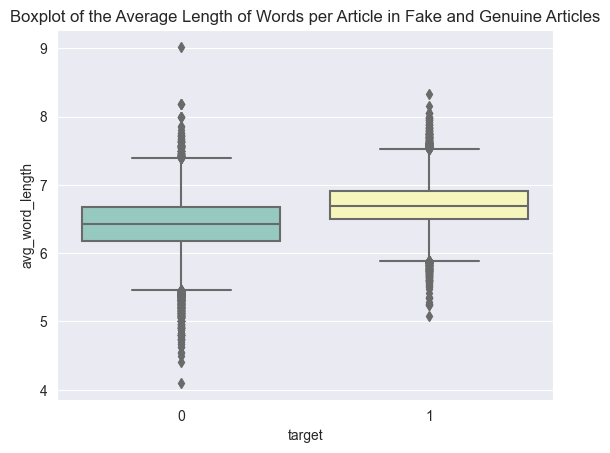

In [54]:
def get_average_word_length(seq_word_tokens):
  return np.mean([len(word) for seq in seq_word_tokens for word in seq])

df['avg_word_length'] = df['sent_word_tokens'].apply(lambda x: get_average_word_length(x))

sns.boxplot(y='avg_word_length', x='target', data=df, palette="Set3")
plt.title("Boxplot of the Average Length of Words per Article in Fake and Genuine Articles")
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_final, df.target, test_size = 0.2,random_state=0)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

Training with different ML models

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [66]:
import time
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score', 'Training Time (secs'
])
models_trained_list = []


def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    # time keeping
    start_time = time.time()
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(X_vec_train, y_train)
    print("Completed {} model training.".format(model_name))
    elapsed_time = time.time() - start_time
    # Time Elapsed
    print("Time elapsed: {:.2f} s.".format(elapsed_time))
    # Predictions
    y_pred = model.predict(X_vec_test)
    # Add to ith row of dataframe - metrics
    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_vec_train, y_train),
        model.score(X_vec_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred), "{:.2f}".format(elapsed_time)
    ]
    # keep a track of trained models
    models_trained_list.append(model)
    print("Completed {} model's performance assessment.".format(model_name))
    prediction = []
    for i in range(len(y_pred)):
        if y_pred[i].item() > 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    cm = confusion_matrix(list(y_test), prediction)
    plt.figure(figsize = (10, 10))
    sns.heatmap(cm, annot = True,fmt='g',cmap='inferno')

Training LogisticRegression model...
Completed LogisticRegression model training.
Time elapsed: 4.95 s.
Completed LogisticRegression model's performance assessment.


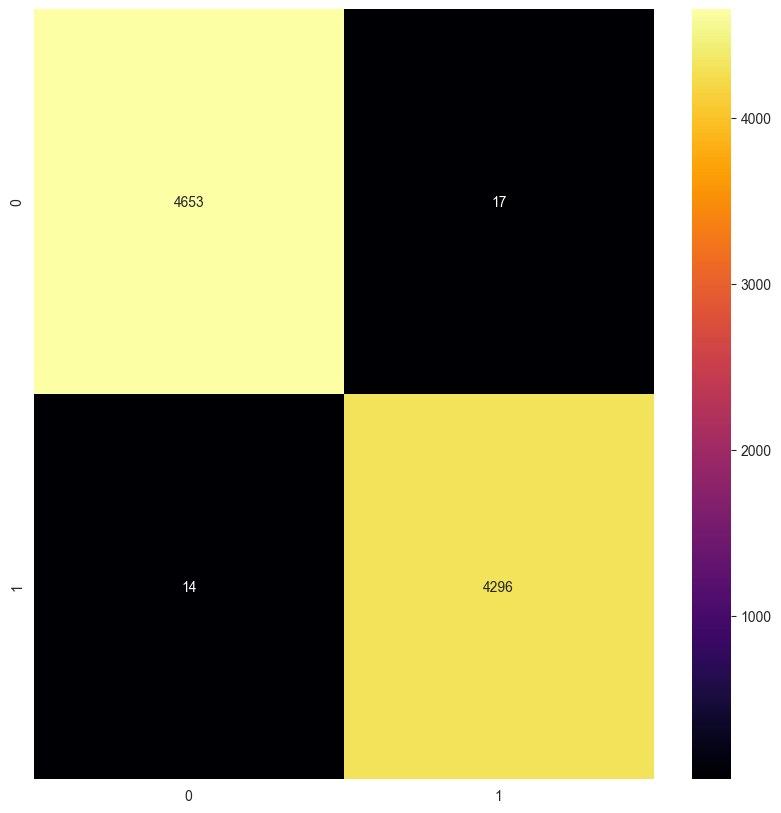

In [68]:
get_perf_metrics(LogisticRegression(), 0)

Training MultinomialNB model...
Completed MultinomialNB model training.
Time elapsed: 0.05 s.
Completed MultinomialNB model's performance assessment.


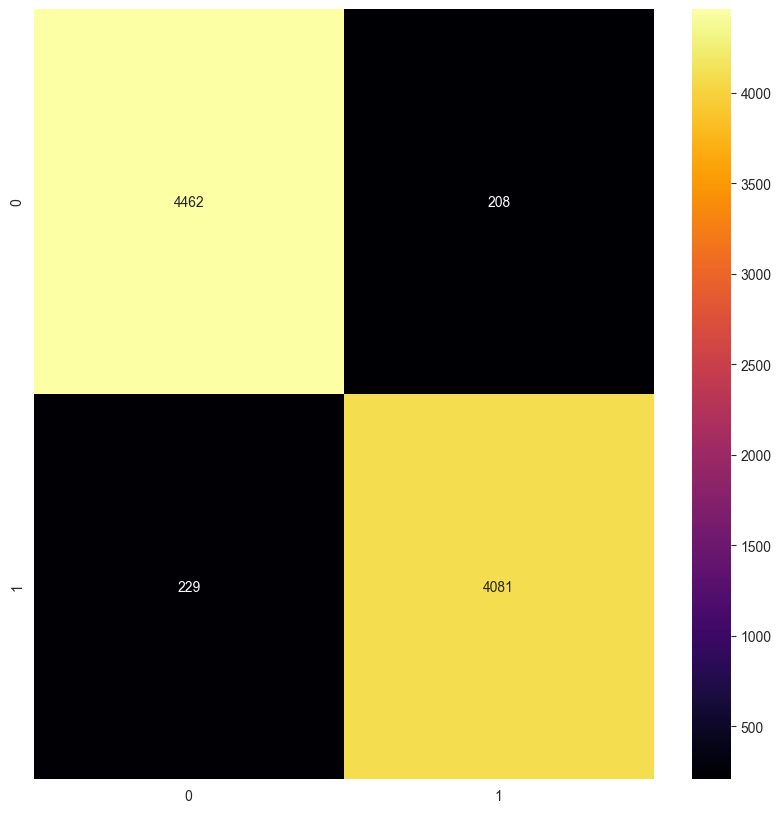

In [69]:
get_perf_metrics(MultinomialNB(), 1)

In [70]:
get_perf_metrics(RandomForestClassifier(), 2)

Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Time elapsed: 155.86 s.
Completed RandomForestClassifier model's performance assessment.


In [71]:
get_perf_metrics(GradientBoostingClassifier(), 3)

Training GradientBoostingClassifier model...
Completed GradientBoostingClassifier model training.
Time elapsed: 104.28 s.
Completed GradientBoostingClassifier model's performance assessment.


Training AdaBoostClassifier model...
Completed AdaBoostClassifier model training.
Time elapsed: 21.66 s.
Completed AdaBoostClassifier model's performance assessment.


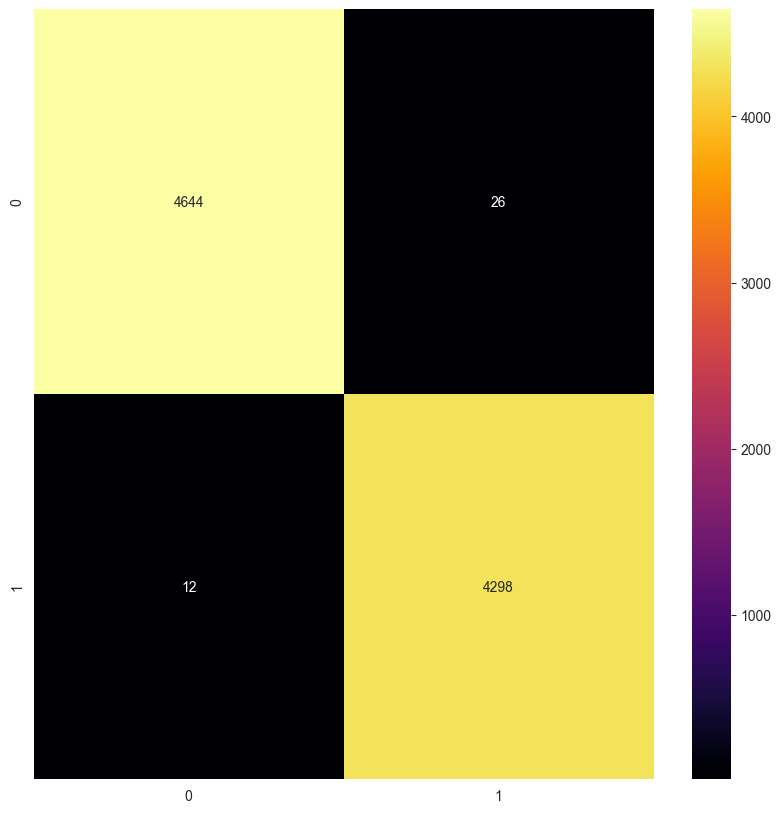

In [72]:
get_perf_metrics(AdaBoostClassifier(), 4)

In [73]:
df_perf_metrics

Model  Accuracy_Training_Set  Accuracy_Test_Set  \
0          LogisticRegression               0.999972           0.996548   
1               MultinomialNB               0.957125           0.951336   
2      RandomForestClassifier               1.000000           0.993318   
3  GradientBoostingClassifier               0.996548           0.996548   
4          AdaBoostClassifier               0.995796           0.995768   

   Precision    Recall  f1_score Training Time (secs  
0   0.996058  0.996752  0.996405                4.95  
1   0.951504  0.946868  0.949180                0.05  
2   0.993039  0.993039  0.993039              155.86  
3   0.994682  0.998144  0.996410              104.28  
4   0.993987  0.997216  0.995599               21.66

Conclusions
Here Logistic regression is most desirable since it has high precision.The training time is also very less.

References:
1. https://onlineacademiccommunity.uvic.ca/isot/2022/11/27/fake-news-detection-datasets/
2. https://www.kaggle.com/code/paramarthasengupta/fake-news-detector-eda-prediction-99#Exploratory-Data-Analysis